# BE Graph - Baptiste Remy & Corentin Triboulet
## Stations de Radio


In [21]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

x = pd.read_csv(r"C:\Users\Corentin Triboulet\PycharmProjects\BE Graphes\.venv\Scripts\X.csv", sep=',', header=None).stack()
y = pd.read_csv(r"C:\Users\Corentin Triboulet\PycharmProjects\BE Graphes\.venv\Scripts\Y.csv", sep=',', header=None).stack()

### Approche sans les graphes

In [22]:
nb_freq = 0

for i in range(len(x)):
   for j in range(i+1,len(y)):
       if np.sqrt((x.iloc[i]-x.iloc[j])**2+(y.iloc[i]-y.iloc[j])**2)<3:
           nb_freq += 1
print("le nombre de fréquences à prendre est :", nb_freq)

le nombre de fréquences à prendre est : 9


Avec cette approche il faudrait prendre 9 fréquences distinctes.

### Approche avec les graphes

On va tester une nouvelle méthode en utilisant les graphes et voir si l'on peut obtenir moins de fréquences.

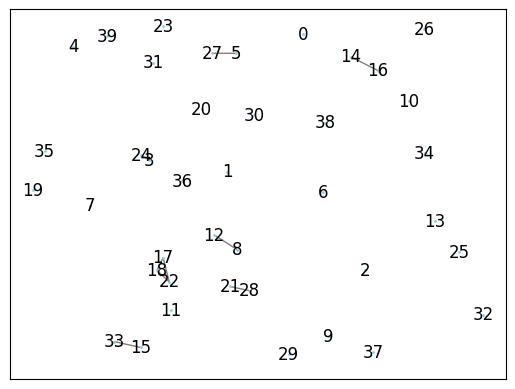

In [23]:
Station = nx.Graph()

positions = {i: (x.iloc[i], y.iloc[i]) for i in range(len(x))}

for i in range(len(x)):
    Station.add_node(i)

for i in range(len(x)):
    for j in range(i + 1, len(x)):  # Skip j = i to avoid self-loops
        distance = np.sqrt((x.iloc[i] - x.iloc[j])**2 + (y.iloc[i] - y.iloc[j])**2)
        if distance < 3:
            Station.add_edge(i, j)

nx.draw_networkx(Station, pos=positions, with_labels=True, node_color='skyblue', node_size=1, edge_color='gray')

plt.show()


On observe que le graph reliant le plus de noeuds en contient 3, ainsi il faudra 3 fréquences différentes.

In [24]:
d = nx.coloring.greedy_color(Station, strategy="largest_first")
#print(d)
print("Le maximum de coloration du graph est:",  max(d.values()))

Le maximum de coloration du graph est: 2


2 étant le nombre maximum de voisin à moins de 3 unités.
Ce resultat confirme ce que nous observions à l'oeil nu. Il faudra alors choisir 3 fréquences.

## Chemin

In [25]:
M = pd.read_csv(r"C:\Users\Corentin Triboulet\PycharmProjects\BE Graphes\.venv\Scripts\M.csv", sep=',', header=None)
print("la matrice d'ajacence est :", M)

la matrice d'ajacence est :     0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  \
0    0  21   0   0   0  10   0   0   0   0   0   0   0   0   0   0   0   0   
1    0   0  17   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2    0   0   0  22  12   0  24   0   0   0   0   0   0   0   0   0   0   0   
3    0   0   0   0   6   0  21   0   0   0   0   0   0   0   0   0   0   0   
4    0   0   0   0   0   0  12  20   0   0   0   0   0   0   0   0   0   0   
5    0   0   0   0   0   0  14  23   0   0   0   0   0   0   0   0   0   0   
6    0   0   0   0   0   0   0   0  12   0   0   0   0   0   8   0   0   0   
7    0   0   0   0   0   0   0   0   8   0   0   0   0   0   9   0   0   0   
8    0   0   0   0   0   0   0   0   0  27  19   0   0   0   0   0   0   0   
9    0   0   0   0   0   0   0   0   0   0  21  11   0  15   0   0   0   0   
10   0   0   0   0   0   0   0   0   0   0   0  30   0   0  24   0   0   0   
11   0   0   0   0   0   0   0   0  

In [26]:
Chemin = nx.DiGraph()
for i in range(M.shape[0]):
    Chemin.add_node(i)

for i in range(M.shape[0]):
    for j in range(M.shape[1]):
        if M.iloc[i,j]!=0:
            Chemin.add_edge(i, j, weight=M.iloc[i,j])


print('Noeuds :', Chemin.nodes)# Liste Sommets
print('Arretes :',Chemin.edges) # Liste Arcs

Noeuds : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Arretes : [(0, 1), (0, 5), (1, 2), (2, 3), (2, 4), (2, 6), (3, 4), (3, 6), (4, 6), (4, 7), (5, 6), (5, 7), (6, 8), (6, 14), (7, 8), (7, 14), (8, 9), (8, 10), (9, 10), (9, 11), (9, 13), (10, 11), (10, 14), (11, 12), (12, 13), (12, 14), (12, 15), (12, 16), (13, 14), (13, 15), (13, 19), (14, 15), (15, 16), (15, 17), (16, 17), (16, 19), (17, 18), (18, 19)]


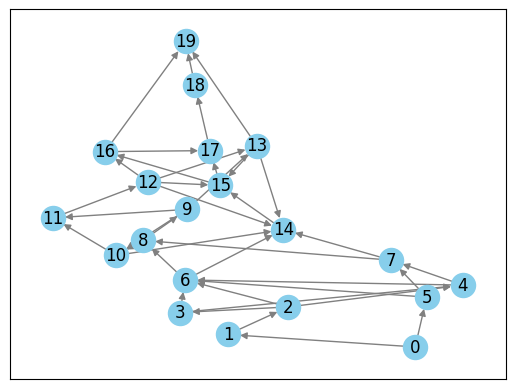

In [27]:
labels = nx.get_edge_attributes(Chemin,'weight')
nx.draw_networkx(Chemin, with_labels=True, node_color='skyblue', edge_color='gray')

#### Chemin optimal de Bellman
On va essayer d'obtenir le chemin optimal par l'algorithme de Bellman en fonction

In [28]:
[(neighbor, Chemin[0][neighbor]['weight']) for neighbor in Chemin.neighbors(0)]

[(1, np.int64(21)), (5, np.int64(10))]

On verifie notre résultat en utilisant la fonction déjà implentée dans nx

In [29]:
length, path = nx.single_source_bellman_ford(Chemin, 0, 19)
print("Distance minimale:", length)
print("Chemin optimal:", path)

Distance minimale: 87
Chemin optimal: [0, 5, 6, 14, 15, 16, 19]


## Flot

In [30]:
Flot=nx.DiGraph()
for i in range(M.shape[0]):
    Flot.add_node(i)

for i in range(M.shape[0]):
    for j in range(M.shape[1]):
        if M.iloc[i,j]!=0:
            Flot.add_edge(i, j, capacity=M.iloc[i,j])

flow_value, flow_dict = nx.maximum_flow(Flot, 0,19)
print("Les chemins possibles sont :", flow_dict)

Les chemins possibles sont : {0: {1: np.int64(17), 5: np.int64(10)}, 1: {2: np.int64(17)}, 2: {3: np.int64(6), 4: np.int64(1), 6: np.int64(10)}, 3: {4: np.int64(6), 6: 0}, 4: {6: 0, 7: np.int64(7)}, 5: {6: np.int64(10), 7: 0}, 6: {8: np.int64(12), 14: np.int64(8)}, 7: {8: np.int64(3), 14: np.int64(4)}, 8: {9: np.int64(15), 10: 0}, 9: {10: 0, 11: 0, 13: np.int64(15)}, 10: {11: 0, 14: 0}, 11: {12: 0}, 12: {13: 0, 14: 0, 15: 0, 16: 0}, 13: {14: 0, 15: 0, 19: np.int64(15)}, 14: {15: np.int64(12)}, 15: {16: np.int64(8), 17: np.int64(4)}, 16: {17: 0, 19: np.int64(8)}, 17: {18: np.int64(4)}, 18: {19: np.int64(4)}, 19: {}}


On observe qu'il y a uniquement 2 arrêtes partant de 0 (1 et 5). Donc le flux maximal est 10 + 17 = 27. On peut également vérfier cela en réalisant le même calcul pour les chemins arrivants à 19 (13, 16 et 18).

In [31]:
print(flow_value)

27


On retrouve bien 27 en utilisant flow_value

## Planning
##### Pour cet exercice, nous avons d'abord cherché à trouver une solution particulière "à la main" 
##### Voici notre résultat 
##### Probabilité:
##### Vendredi 8h-10h: CB, OD, SV, GL
##### Vendredi 13h-15h: OD, CM
##### Jeudi 8h-10h: GL, CH, RG, PM
##### Jeudi 13h-15h : CB, SV, RG, AS
##### Analyse:
##### Vendredi 8h-10h: KD, VT, EM, MB
##### Vendredi 13h-15h: EM, MB
##### Jeudi 8h-10h: EK, KD, VT, PM
##### Jeudi 13h-15h : EK, AS, KD, VT
##### 
##### Cette solution permet à chaque professeur de donner 2 cours (3 pour VT et KD)
##### Essayons de la retrouver par les graphs


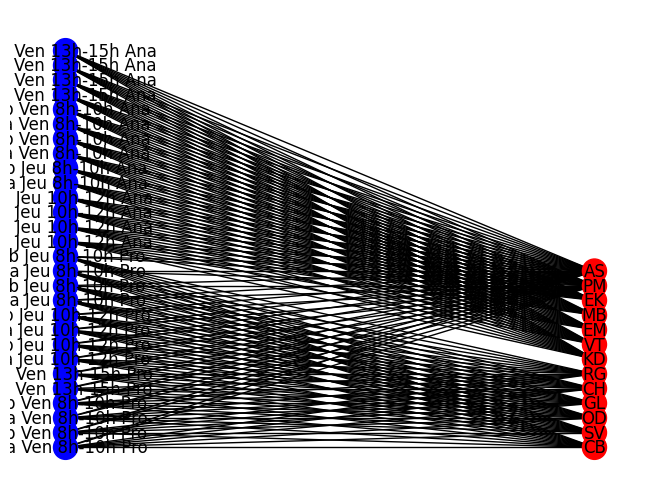

In [32]:
Intervenants = ['CB', 'SV', 'OD', 'GL', 'CH', 'RG', 'KD', 'VT', 'EM', 'MB', 'EK', 'PM', 'AS']

combinaisons = [
    'A1a Ven 8h-10h Pro', 'A1b Ven 8h-10h Pro', 'A2a Ven 8h-10h Pro', 'A2b Ven 8h-10h Pro',
    'B2a Ven 13h-15h Pro', 'B2b Ven 13h-15h Pro',
    'C1a Jeu 10h-12h Pro', 'C1b Jeu 10h-12h Pro', 'C2a Jeu 10h-12h Pro', 'C2b Jeu 10h-12h Pro',
    'D1a Jeu 8h-10h Pro', 'D1b Jeu 8h-10h Pro', 'D2a Jeu 8h-10h Pro', 'D2b Jeu 8h-10h Pro',
    'A1a Jeu 10h-12h Ana', 'A1b Jeu 10h-12h Ana', 'A2a Jeu 10h-12h Ana', 'A2b Jeu 10h-12h Ana',
    'B2a Jeu 8h-10h Ana', 'B2b Jeu 8h-10h Ana',
    'C1a Ven 8h-10h Ana', 'C1b Ven 8h-10h Ana', 'C2a Ven 8h-10h Ana', 'C2b Ven 8h-10h Ana',
    'D1a Ven 13h-15h Ana', 'D1b Ven 13h-15h Ana', 'D2a Ven 13h-15h Ana', 'D2b Ven 13h-15h Ana'
]

G = nx.Graph()
G.add_nodes_from(combinaisons, bipartite=0, color="red")
G.add_nodes_from(Intervenants, bipartite=1)

combinaisons_ana = ['A1a Jeu 10h-12h Ana', 'A1b Jeu 10h-12h Ana', 'A2a Jeu 10h-12h Ana', 'A2b Jeu 10h-12h Ana',
             'B2a Jeu 8h-10h Ana', 'B2b Jeu 8h-10h Ana',
             'C1a Ven 8h-10h Ana', 'C1b Ven 8h-10h Ana', 'C2a Ven 8h-10h Ana', 'C2b Ven 8h-10h Ana',
             'D1a Ven 13h-15h Ana', 'D1b Ven 13h-15h Ana', 'D2a Ven 13h-15h Ana', 'D2b Ven 13h-15h Ana']

combinaisons_pro = [
    'A1a Ven 8h-10h Pro', 'A1b Ven 8h-10h Pro', 'A2a Ven 8h-10h Pro', 'A2b Ven 8h-10h Pro',
    'B2a Ven 13h-15h Pro', 'B2b Ven 13h-15h Pro',
    'C1a Jeu 10h-12h Pro', 'C1b Jeu 10h-12h Pro', 'C2a Jeu 10h-12h Pro', 'C2b Jeu 10h-12h Pro',
    'D1a Jeu 8h-10h Pro', 'D1b Jeu 8h-10h Pro', 'D2a Jeu 8h-10h Pro', 'D2b Jeu 8h-10h Pro']



professors_ana = ['KD', 'VT', 'MB', 'EM', 'EK', 'PM', 'AS']
professors_pro = ['CB', 'SV', 'OD', 'GL', 'CH', 'RG', 'PM', 'AS']


new_edges = []
for comb in combinaisons_ana:
    for prof in professors_ana:
            new_edges.append((comb, prof))

for comb in combinaisons_pro:
    for prof in professors_pro:
            new_edges.append((comb, prof))

# Ajouter les nouvelles arêtes au graphe
G.add_edges_from(new_edges)



pos = {}
pos.update((n, (0, i)) for i, n in enumerate(combinaisons))
pos.update((n, (1, i)) for i, n in enumerate(Intervenants))
color_node= ["blue"]*28+["red"]*13
nx.draw(G, pos, with_labels=True,node_color=color_node)
plt.show()

Après cela, nous n'avons pas réussi à réaliser quelque chose de concluant. Nous voulions utiliser le graph dual afin de colorer les arrêtes. Cela aurait permis d'identifier les combinaions réalisable en même temps. 

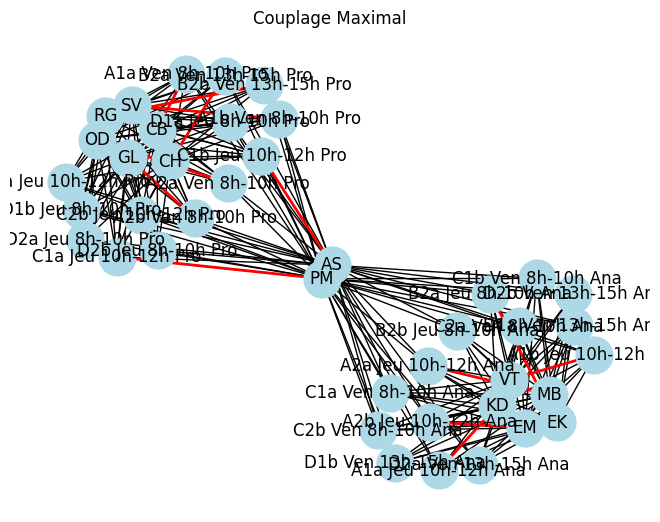

In [33]:
matching = nx.maximal_matching(G)

pos = nx.spring_layout(G)  # Positionnement des nœuds
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=700)

matching_edges = [(u, v) for u, v in matching]
nx.draw_networkx_edges(G, pos, edgelist=matching_edges, edge_color='red', width=2)

plt.title("Couplage Maximal")
plt.show()

Nous avons aussi essayé l'algorithme de couplage maximum mais non n'arrivons pas à l'interpréter. Nous pensons qu'il n'est pas adacpté pour notre problème car il renvoie uniquement une classe par professeur 